In [19]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pyclustering as pycl
from pyclustering.cluster.xmeans import xmeans, splitting_type
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import timedcall
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [20]:
%config IPCompleter.greedy=True

In [21]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')
lines = data.readlines()
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)
z=np.array(new_lines)

In [33]:
pca = PCA(n_components=3)
pca.fit(z)
sample = pca.transform(z)
sample[9]

array([-5.15569362,  0.51275568, -1.71171696])

In [34]:
sample=sample.tolist()

In [35]:
%%time
#initial_centers = kmeans_plusplus_initializer(sample, 2).initialize()
xmeans_instance = xmeans(sample,ccore=True)
xmeans_instance.process()
(ticks, _) = timedcall(xmeans_instance.process)
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

CPU times: user 1.36 s, sys: 0 ns, total: 1.36 s
Wall time: 1.36 s


In [36]:
print('Execution Time: ',ticks,'Sec')

Execution Time:  0.13334000000000046 Sec


**Centroids of newly formed clusters**

In [37]:
#centers

**Number of Clusters found**

In [38]:
number_of_clusters = len(centers)
print('Number of Clusters Found = '+str(number_of_clusters))

Number of Clusters Found = 20


In [39]:
#clusters

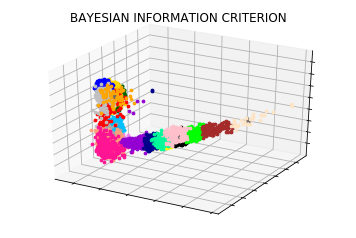

In [41]:
#Visualize the cluster across principal components
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, sample);
visualizer.set_canvas_title("BAYESIAN INFORMATION CRITERION");
visualizer.append_cluster(centers, None, marker = '*');
visualizer.show();

In [42]:
sample1=pd.DataFrame(sample).values
centers1=np.array(centers)

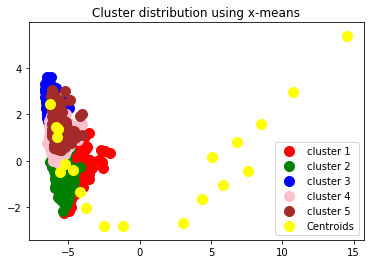

In [45]:
#Scatter plot with better cluster visualization
plt.scatter(sample1[clusters[0],0],sample1[clusters[0],1],s=100,c='red',label='cluster 1')
plt.scatter(sample1[clusters[1],0],sample1[clusters[1],1],s=100,c='green',label='cluster 2')
plt.scatter(sample1[clusters[2],0],sample1[clusters[2],1],s=100,c='blue',label='cluster 3')
plt.scatter(sample1[clusters[3],0],sample1[clusters[3],1],s=100,c='pink',label='cluster 4')
plt.scatter(sample1[clusters[4],0],sample1[clusters[4],1],s=100,c='brown',label='cluster 5')

#plot centers of respective clusters
plt.scatter(centers1[:,0],centers1[:,1],s=100,c='yellow',label='Centroids')

plt.title('Cluster distribution using x-means')
plt.legend()

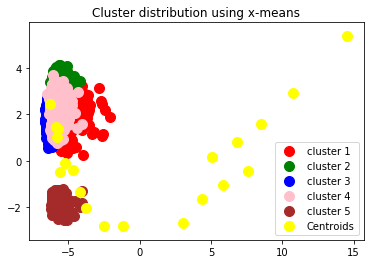

In [46]:
#Scatter plot with better cluster visualization
plt.scatter(sample1[clusters[0],0],sample1[clusters[0],2],s=100,c='red',label='cluster 1')
plt.scatter(sample1[clusters[1],0],sample1[clusters[1],2],s=100,c='green',label='cluster 2')
plt.scatter(sample1[clusters[2],0],sample1[clusters[2],2],s=100,c='blue',label='cluster 3')
plt.scatter(sample1[clusters[3],0],sample1[clusters[3],2],s=100,c='pink',label='cluster 4')
plt.scatter(sample1[clusters[4],0],sample1[clusters[4],2],s=100,c='brown',label='cluster 5')

#plot centers of respective clusters
plt.scatter(centers1[:,0],centers1[:,1],s=100,c='yellow',label='Centroids')

plt.title('Cluster distribution using x-means')
plt.legend()

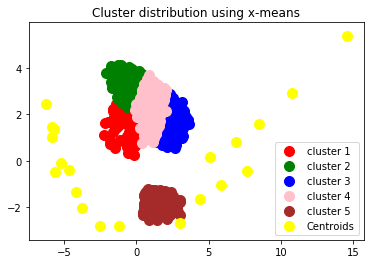

In [48]:
#Scatter plot with better cluster visualization
plt.scatter(sample1[clusters[0],1],sample1[clusters[0],2],s=100,c='red',label='cluster 1')
plt.scatter(sample1[clusters[1],1],sample1[clusters[1],2],s=100,c='green',label='cluster 2')
plt.scatter(sample1[clusters[2],1],sample1[clusters[2],2],s=100,c='blue',label='cluster 3')
plt.scatter(sample1[clusters[3],1],sample1[clusters[3],2],s=100,c='pink',label='cluster 4')
plt.scatter(sample1[clusters[4],1],sample1[clusters[4],2],s=100,c='brown',label='cluster 5')

#plot centers of respective clusters
plt.scatter(centers1[:,0],centers1[:,1],s=100,c='yellow',label='Centroids')

plt.title('Cluster distribution using x-means')
plt.legend()